In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",
           skiprows=22, header=None)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\souma\AppData\Local\Temp\ipykernel_31628\3211529144.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+",


In [33]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1012 non-null   float64
 1   1       1012 non-null   float64
 2   2       1012 non-null   float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
dtypes: float64(11)
memory usage: 87.1 KB


In [6]:
X = np.hstack([raw_df.values[::2, :],
        raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [26]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=1)


In [27]:
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [28]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))


Coefficients:  [-1.16259926e-01  5.56061815e-02  2.42066570e-03  2.58498034e+00
 -1.91474547e+01  3.54362973e+00 -5.86296897e-04 -1.59321860e+00
  3.16227116e-01 -1.20965602e-02 -9.20798781e-01  8.75217941e-03
 -5.18191990e-01]
Variance score: 0.7786386580298909


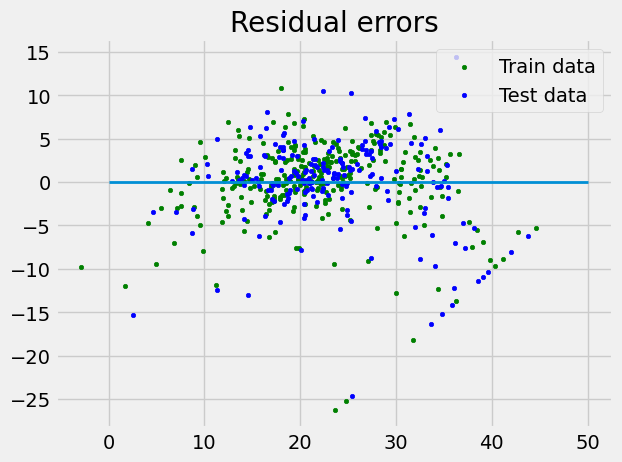

In [17]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()


In [20]:
y_pred = reg.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 25.2058
R² Score: 0.7209
